# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [2]:
import pandas as pd
import numpy as np

import math
import json
import re
from pprint import pprint

import collections
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from networkx.algorithms import approximation as aprx

In [18]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [23]:
df = pd.read_csv("d.csv")
stops = pd.read_csv("stops.txt")

In [24]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631479 entries, 0 to 631478
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      631479 non-null  int64 
 1   stop_from       631479 non-null  object
 2   stop_from_name  631479 non-null  object
 3   stop_to         631479 non-null  object
 4   stop_to_name    631479 non-null  object
 5   depart_from     631479 non-null  object
 6   arrive_to       631479 non-null  object
 7   route_type      631479 non-null  int64 
 8   is_night        631479 non-null  int64 
 9   monday          631479 non-null  int64 
 10  tuesday         631479 non-null  int64 
 11  wednesday       631479 non-null  int64 
 12  thursday        631479 non-null  int64 
 13  friday          631479 non-null  int64 
 14  saturday        631479 non-null  int64 
 15  sunday          631479 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 77.1+ MB


,Unnamed: 0,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,35575,U865Z2P,Vozovna Motol,U394Z2P,Motol,6:07:00,6:08:00,0,0,1,1,1,1,1,0,0
1,35576,U394Z2P,Motol,U395Z2P,Krematorium Motol,6:08:00,6:09:00,0,0,1,1,1,1,1,0,0
2,35577,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,6:09:00,6:10:00,0,0,1,1,1,1,1,0,0
3,35578,U113Z2P,Hlušičkova,U236Z2P,Slánská,6:10:00,6:12:00,0,0,1,1,1,1,1,0,0
4,35579,U236Z2P,Slánská,U47Z2P,Blatiny,6:12:00,6:13:00,0,0,1,1,1,1,1,0,0
5,35580,U47Z2P,Blatiny,U612Z2P,Sídliště Řepy,6:13:00,6:15:00,0,0,1,1,1,1,1,0,0
6,35581,U865Z2P,Vozovna Motol,U394Z2P,Motol,5:31:00,5:32:00,0,0,1,1,1,1,1,0,0
7,35582,U394Z2P,Motol,U395Z2P,Krematorium Motol,5:32:00,5:33:00,0,0,1,1,1,1,1,0,0
8,35583,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,5:33:00,5:34:00,0,0,1,1,1,1,1,0,0
9,35584,U113Z2P,Hlušičkova,U236Z2P,Slánská,5:34:00,5:36:00,0,0,1,1,1,1,1,0,0


Jako první si převedu všechny špatně uvedené časy, tedy časy, ve kterých je počet hodin větší než 23, na časy zmodulené modulo 24 a následně je převedu na datový formát datetime, aby se mi s nimi pouzději lépe pracovalo.

In [25]:
def corect_time(df):
    if df[1].isnumeric():
        num = int(df[0] + df[1])
        num = num % 24
        df = str(num) + df[2:]
    else:
        num = int(df[0])
        num = num % 24
        df = str(num) + df[1:]
    return df

In [26]:
df["arrive_to"] = df["arrive_to"].apply(lambda x : corect_time(x))
df["depart_from"] = df["depart_from"].apply(lambda x : corect_time(x))

In [12]:
df['depart_from'] = pd.to_datetime(df['depart_from'], format='%H:%M:%S')
df['arrive_to'] = pd.to_datetime(df['arrive_to'], format='%H:%M:%S')

/var/folders/3r/zq3hzccs01196w7_ds8c4r7c0000gn/T/ipykernel_19376/2590430090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['depart_from'] = pd.to_datetime(df['depart_from'], format='%H:%M:%S')
/var/folders/3r/zq3hzccs01196w7_ds8c4r7c0000gn/T/ipykernel_19376/2590430090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrive_to'] = pd.to_datetime(df['arrive_to'], format='%H:%M:%S')


In [13]:
df.loc[(df["route_type"] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575015 entries, 35575 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   stop_from       575015 non-null  object        
 1   stop_from_name  575015 non-null  object        
 2   stop_to         575015 non-null  object        
 3   stop_to_name    575015 non-null  object        
 4   depart_from     575015 non-null  datetime64[ns]
 5   arrive_to       575015 non-null  datetime64[ns]
 6   route_type      575015 non-null  int64         
 7   is_night        575015 non-null  int64         
 8   monday          575015 non-null  int64         
 9   tuesday         575015 non-null  int64         
 10  wednesday       575015 non-null  int64         
 11  thursday        575015 non-null  int64         
 12  friday          575015 non-null  int64         
 13  saturday        575015 non-null  int64         
 14  sunday          575015 non-null

Příznak `route_type` označuje typ dopravního prostředku. Pro lepší vizualizaci zvolím liky tramvají, tedy hodnotu 0.

(0 : tramvaje, 1 : metro, 2 : dálková doprava?, 3 : bus, 4 : vlak, 5 : nic, 6 : nic, 7 : lanovka)

Data o tramvajích obsahují přes 570 000 řádků a pouze 281 unikátních zastávek (unikátní zastávky jsem si vybrala takové, které mají unikátní název, nikoliv id, protože například zastávka Palmovka má právě čtyři možné zastávky tramvaje a v grafu bych měla několik hran a vrcholů navíc, které by ho dělaly nepřehledným), které na mapě vyniknou narozdíl od autobusové sítě, která obsahuje přes 6000 zastávek v Praze a dalších deseti pásmech napříč Středočeským krajem. 

## Míra centality

### 1. míra centrality měřená na základě vzdálenosti od středu grafu

První míru centrality jsem se rozhodla vyjádřit tzv. `closeness_centrality`, které ukazuje, jak jsou body blízko středu grafu, v mém případě, jak jsou blízko středu Prahy. Použiji data o tramvajích (viz. výše). Pro mojezkoumání zahrnu zastávky na kterých zastavují i noční spoje.

In [14]:
df_tram = df.loc[(df["route_type"] == 0)]
df_tram= df_tram.drop(labels=["route_type", "is_night"], axis=1)

In [15]:
df_tram.nunique()

stop_from          599
stop_from_name     281
stop_to            591
stop_to_name       280
depart_from       3388
arrive_to         3388
monday               2
tuesday              2
wednesday            2
thursday             2
friday               2
saturday             2
sunday               2
dtype: int64

Zajímavé je, že nesedí počet zastávek `stop_from` a `stop_to`. Ale je to jen zapříčeněné tím, že některé zastávky v určitém směru neexistují. Například zastávka *Korunovační* na Letné. 

In [16]:
df_tram_by_name = df_tram.groupby(by=["stop_from_name","stop_to_name"]).size()

S datasetu `stops.txt` si vytvořím dvojice obsahující polohu tramvajové zastávky. Vzhledem k tomu, že osahuje duplictní údaje pokud se podíváme na sloupec `stop_name`, použiji vždy ten první v pořadí. ID z datasetu odstraním, nebudu jej potřebovat, protože mým klíčem bude název.

In [17]:
stops.drop_duplicates(subset=["stop_name"], inplace=True, keep="first")

# create a dictionary of stop and its coordinates
stops["coordinates"] = stops[["stop_lon" , "stop_lat"]].values.tolist()
stops_pos = stops[["stop_name", "coordinates"]]
stops_pos = dict(zip(stops_pos["stop_name"], stops_pos["coordinates"]))

In [13]:
#set labels of terminals stations
labeldict_left = {}
labeldict_right = {}
labeldict_down = {}
labeldict_right["Vozovna Kobylisy"] = "Vozovna\n Kobylisy"
labeldict_right["Nádraží Podbaba"] = "Nádraží\n Podbaba"
labeldict_right["Sídliště Petřiny"] = "Sídliště\n Petřiny"
labeldict_left["Sídliště Ďáblice"] = "Sídliště\n Ďáblice"
labeldict_right["Sídliště Řepy"] = "Sídliště Řepy"
labeldict_down["Sídliště Barrandov"] = "Sídliště\n Barrandov"
labeldict_down["Sídliště Modřany"] = "Sídliště\n Modřany"
labeldict_left["Lehovec"] = "Lehovec"
labeldict_right["Divoká Šárka"] = "Divoká\n Šárka"
labeldict_left["Spojovací"] = "Spojovací"
labeldict_down["Spořilov"] = "Spořilov"
labeldict_right["Vozovna Pankrác"] = "Vozovna\n Pankrác"
labeldict_right["Bílá Hora"] = "Bílá Hora"
labeldict_left["Ústřední dílny DP"] = "Ústřední\n dílny DP"
labeldict_left["Nádraží Hostivař"] = "Nádraží\n Hostivař"

In [14]:
G = nx.Graph()
# create an array of edges
for key in df_tram_by_name.to_dict().keys():
    G.add_edge(key[0], key[1])
nodes = G.nodes()
degrees = G.degree()
edges = G.edges()

In [15]:
deg_centrality = nx.closeness_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)

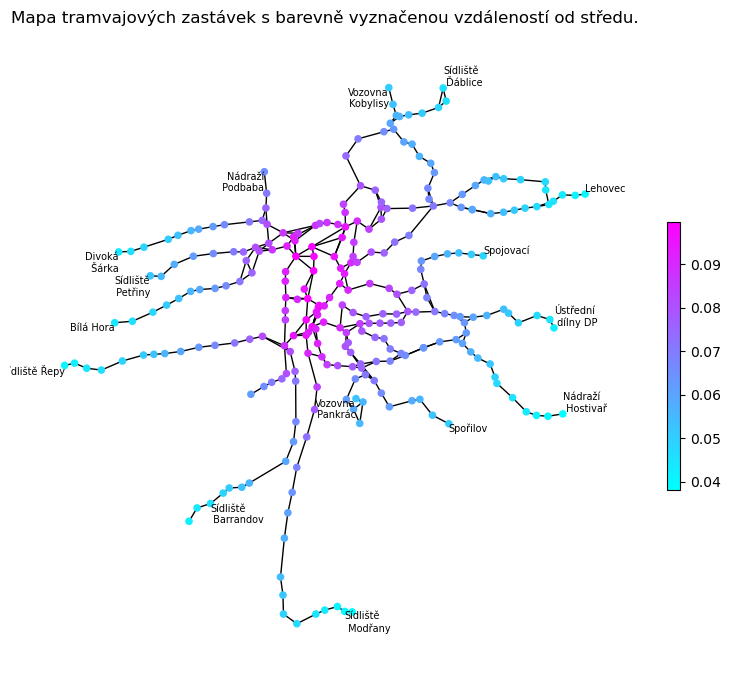

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=7, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=7, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=7, verticalalignment='top', horizontalalignment = "left")
nx.draw(G, pos=stops_pos, node_size=1)
graph = nx.draw_networkx_nodes(G, pos=stops_pos,node_size=20,nodelist=nodes,node_color=centrality,cmap='cool',ax=ax)
plt.title("Mapa tramvajových zastávek s barevně vyznačenou vzdáleností od středu.")
plt.tight_layout()
plt.colorbar(graph, fraction=0.02, pad=0.04)
plt.show()

### 2. míra centrality měřená stupněm uzlu

V této vizualizaci je ukážu kolik hran vede do jednotlivých vrcholů. Na barevné škále jevidět, kolik hran přesně do vrcholu vede. V koláčovém grafu vyjádřím jaký je poměr stanic s *n* cestami. Zvolila jsem identickou barevnou škálu pro lepší pochopení čtenáře.


In [17]:
df_degree = df_tram[["stop_from_name","stop_to_name"]]
df_degree = df_degree.groupby(by=["stop_from_name","stop_to_name"]).size().reset_index()
df_degree = df_degree.groupby(by=["stop_from_name"]).size()
df_degree = pd.DataFrame({"values":df_degree.values}, index=df_degree.index)
df_degree = df_degree.groupby(['values'])['values'].count()

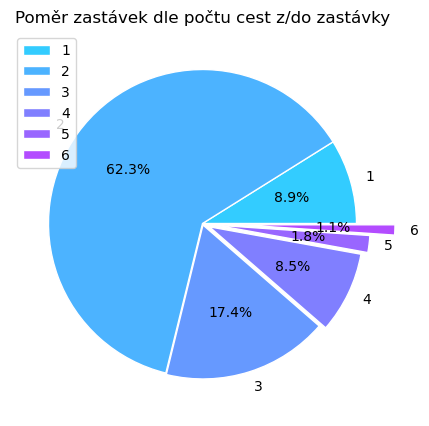

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
colors = plt.get_cmap('cool')(np.linspace(0.2, 0.7, len(df_degree)))
explode = (0,0,0.01,0.05,0.09,0.25)
plt.pie(df_degree, labels=df_degree.index, colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"},
        autopct='%1.1f%%', explode=explode)
plt.legend(df_degree.index)
plt.title("Poměr zastávek dle počtu cest z/do zastávky")
plt.show()

Zde je z koláčového grafu vidět, kolik procent například tvoří konečné stanice.

In [19]:
deg_centrality = nx.degree_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)

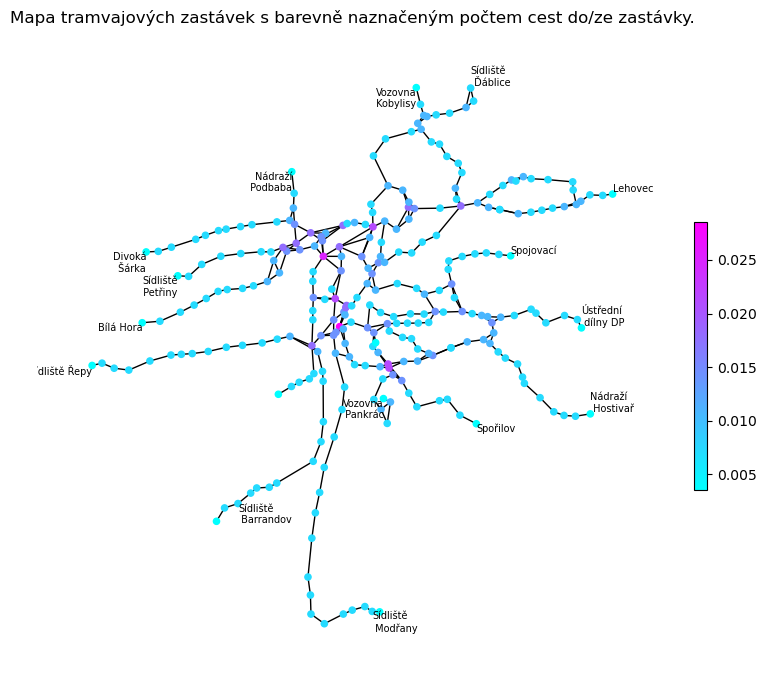

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
nx.draw(G, pos=stops_pos, node_size=1)
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=7, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=7, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=7, verticalalignment='top', horizontalalignment = "left")
graph = nx.draw_networkx_nodes(G, pos=stops_pos, node_size=20, nodelist=nodes, node_color=centrality, cmap='cool', ax=ax)
plt.title("Mapa tramvajových zastávek s barevně naznačeným počtem cest do/ze zastávky.")
plt.tight_layout()
plt.colorbar(graph, fraction=0.02, pad=0.04)
plt.show()

### 3. Míra centrality měřená na základě důležitosti vrcholu

Třetí míru centrality jsem vybla takzvanou `Eigenvector centrality`, která určuje důležitos/prestižnost vrcholu v daném grafu. Tato centralita se u konkrétního vrcholu počítá z centrality jeho sousedů, tedy nejprestižnějším vrcholem bude takový, který měl částečně prestiční i své sousedy.

In [21]:
deg_centrality = nx.eigenvector_centrality_numpy(G)
centrality = np.fromiter(deg_centrality.values(), float)

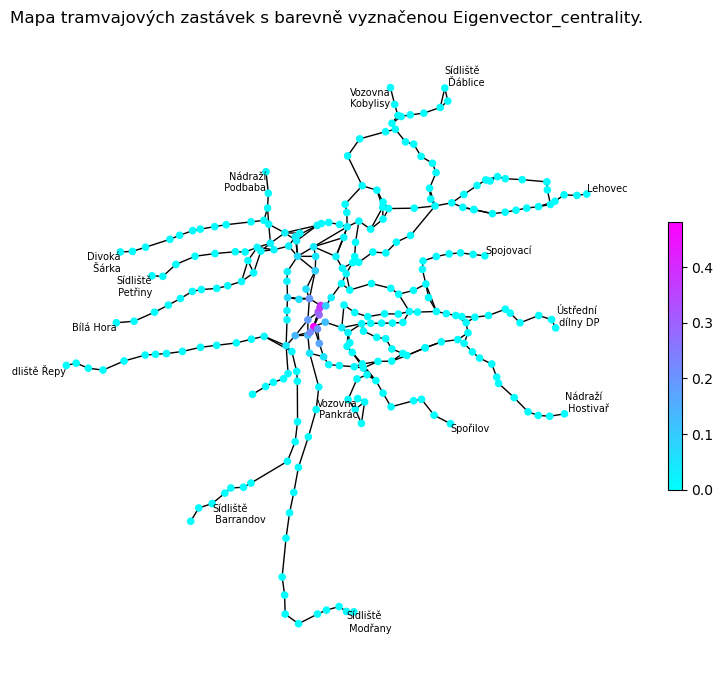

In [22]:
fig, ax = plt.subplots(figsize=(7, 7))
nx.draw(G, pos=stops_pos, node_size=1)
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=7, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=7, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=7, verticalalignment='top', horizontalalignment = "left")
graph = nx.draw_networkx_nodes(G, pos=stops_pos, node_size=20, nodelist=nodes, node_color=centrality, cmap='cool', ax=ax)
plt.title("Mapa tramvajových zastávek s barevně vyznačenou Eigenvector_centrality.")
plt.tight_layout()
plt.colorbar(graph, fraction=0.02, pad=0.04)
plt.show()

## Vlastní otázky

### 1. Kolik tramvajových souprav a souprav metra projede zastávkou během týdne?

Pomocí histogramu budu sledovat zastávky metra a tramvají se stejným názvem. Vyjádřím počet souprav, které vyjely z příslušné zastávky a porovnám jejich hodnoty. 

In [23]:
df_tram = df.loc[(df["route_type"] == 0)]
df_tram = df_tram.drop(labels=["route_type", "is_night"], axis=1)
df_tram["weekday"] = df_tram["monday"].replace([1], 5)
df_tram.drop(["monday", "tuesday", "wednesday", "thursday", "friday"], axis=1, inplace=True)
df_tram_freq = df_tram.groupby(by=["stop_from_name"]).sum()
df_tram_freq["tram"] = df_tram_freq["sunday"] + df_tram_freq["saturday"] + df_tram_freq["weekday"]
df_tram_freq.drop(["sunday","saturday","weekday"], axis=1, inplace=True)

In [24]:
df_metro = df.loc[(df["route_type"] == 1)]
df_metro = df_metro.drop(labels=["route_type", "is_night"], axis=1)
df_metro["weekday"] = df_metro["monday"].replace([1], 5)
df_metro.drop(["monday", "tuesday", "wednesday", "thursday", "friday"], axis=1, inplace=True)
df_metro_freq = df_metro.groupby(by=["stop_from_name"]).sum()
df_metro_freq["metro"] = df_metro_freq["sunday"] + df_metro_freq["saturday"] + df_metro_freq["weekday"]
df_metro_freq.drop(["sunday","saturday","weekday"], axis=1, inplace=True)

In [25]:
df_metro_tram_freq = pd.concat([df_metro_freq, df_tram_freq], axis=1)
df_metro_tram_freq.dropna(inplace=True)
df_metro_tram_freq.reset_index(inplace=True)

In [26]:
df_metro_tram_freq = df_metro_tram_freq.melt("stop_from_name", var_name="kind", value_name="amount")

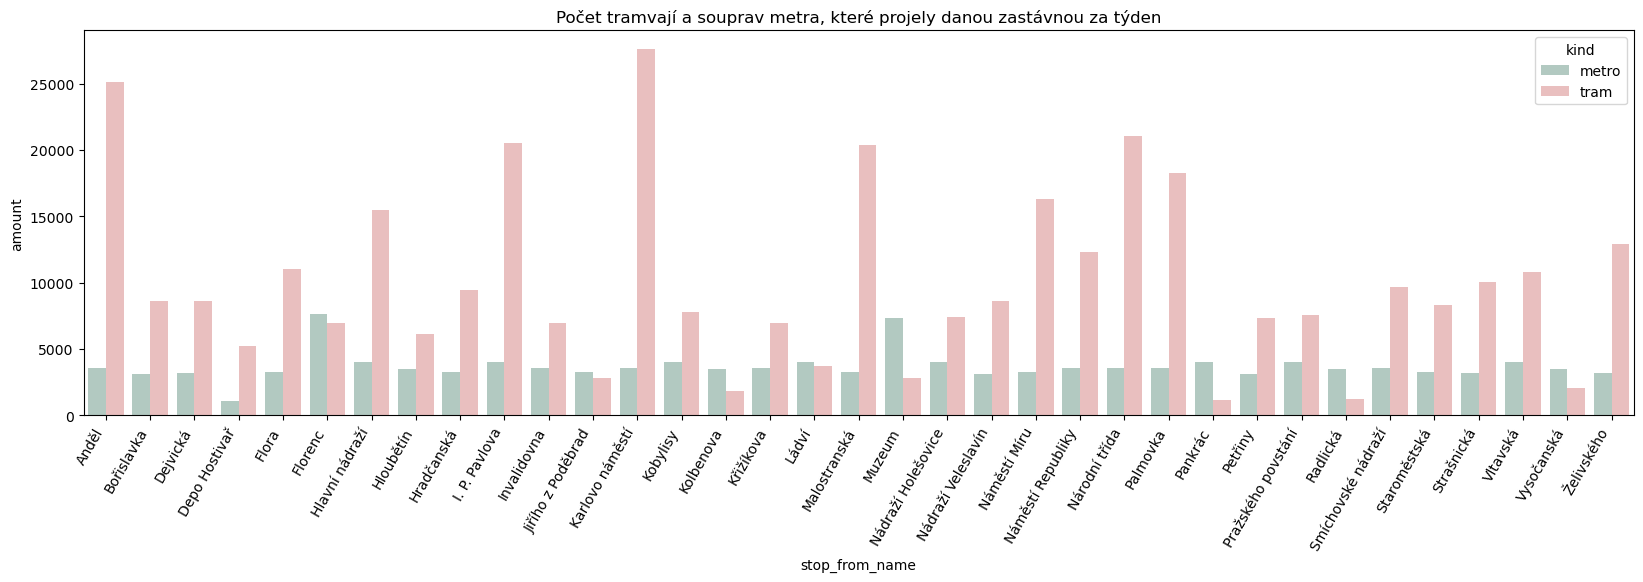

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=df_metro_tram_freq, x="stop_from_name", y="amount", hue="kind", palette=("#aecdc2","#f0b8b8"))
ax.xaxis.set_tick_params(labelsize=10)
plt.title("Počet tramvají a souprav metra, které projely danou zastávnou za týden")
plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

Z grafu je vidět, že souprav metra je výrazně méně než souprav tramvajových. Pro mě osobně je to velmi překvapivé zjištění. Avšak v přestupních stanicích, kde přirozeně projede zhruba 2x tolik souprav metra než na jiných zastávkách, je frekvence i vyšší. Z histogramu lze i jednoduše zpozorovat konečné stanice, na kterých je počet výrazně nižšší, např. Depo Hostivař - metro, Radlická - tramvaj, Pankrác - tramvaj a další.

### 2. Liší se důležotost zastávek v nočním a denním provozu dle centrality?

Pro následující ukázku použiji opět centralitu `Eigenvector_centrality`. Avšak budu vizualizovat mapu zastávek pouze nočních a denních  spojů. Následně se pokusím vyzualizovat důležitost na barevné škále.

In [28]:
df_day = df.loc[(df["is_night"] == 0) & (df["route_type"] == 0)]
df_day = df_day.drop(labels=["route_type", "is_night"], axis=1)
df_day = df_day.groupby(by=["stop_from_name","stop_to_name"]).size()

In [29]:
H = nx.Graph()
for key in df_day.to_dict().keys():
    H.add_edge(key[0], key[1], weight = df_day.to_dict().get((key[0],key[1])))
nodes = H.nodes()
degrees = H.degree()
edges = H.edges()

In [30]:
deg_centrality = nx.eigenvector_centrality_numpy(H)
centrality_H = np.fromiter(deg_centrality.values(), float)

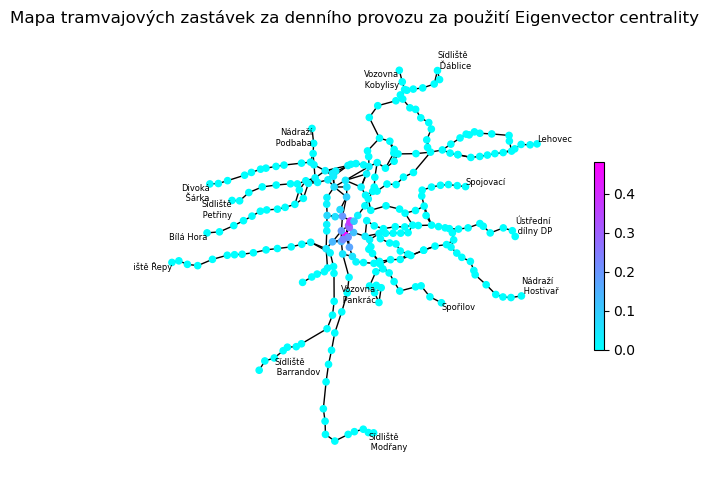

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=6, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=6, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=6, verticalalignment='top', horizontalalignment = "left")
nx.draw(H, pos=stops_pos, node_size=1)
graph = nx.draw_networkx_nodes(H, pos=stops_pos, node_size=20, nodelist=H.nodes, node_color=centrality_H, cmap='cool', ax=ax)
plt.title("Mapa tramvajových zastávek za denního provozu za použití Eigenvector centrality")
plt.tight_layout()
plt.colorbar(graph, fraction=0.02, pad=0.04)
plt.show()

In [32]:
df_night = df.loc[(df["is_night"] == 1) & (df["route_type"] == 0)]
df_night = df_night.drop(labels=["route_type", "is_night"], axis=1)
df_night = df_night.groupby(by=["stop_from_name","stop_to_name"]).size()

In [33]:
G = nx.Graph()
for key in df_night.to_dict().keys():
    G.add_edge(key[0], key[1], weight = df_night.to_dict().get((key[0],key[1])))
nodes = G.nodes()
degrees = G.degree()
edges = G.edges()

In [34]:
deg_centrality = nx.eigenvector_centrality_numpy(G)
centrality = np.fromiter(deg_centrality.values(), float)

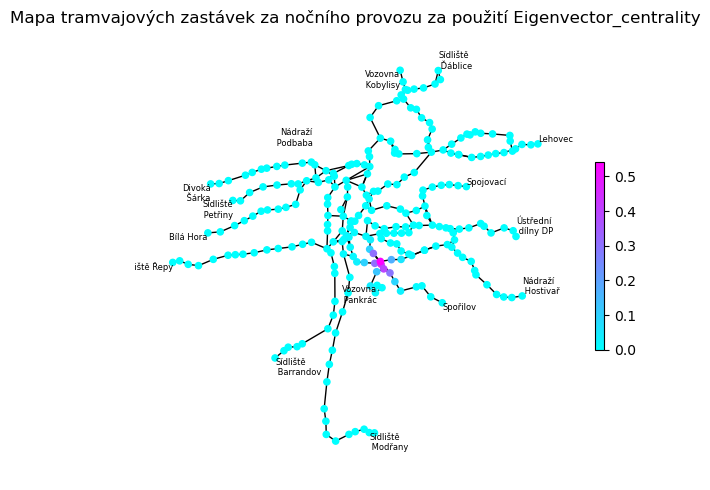

In [35]:
fig, ax = plt.subplots(figsize=(5,5))

nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=6, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=6, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=6, verticalalignment='top', horizontalalignment = "left")

nx.draw(G, pos=stops_pos, node_size=1)
graph = nx.draw_networkx_nodes(G, pos=stops_pos, node_size=20, nodelist=G.nodes, node_color=centrality, cmap='cool', ax=ax)
plt.title("Mapa tramvajových zastávek za nočního provozu za použití Eigenvector_centrality")
plt.tight_layout()
plt.colorbar(graph, fraction=0.02, pad=0.04)
plt.show()

Z výstupu map je vidět, že opravdu pro denní a noční provoz jsou důležité jiné zastávky. Pro denní provoz je to Karlovo náměstí, Národní třída a jejich okolní zastávky. V nočním provozu je to oblast Vršovic okolo Náměstí Bratří Synků.

### 3. Jak frekventované jsou useky mezi zastávkami tramvají během všedního dne vs. v neděli?

Pro zobrazení použiji stejnou mapu jako v předešlých vizualizacích s tím, že přiřadím hranám grafu váhu, podle počtu zááznamů - počtu tramvají, které zde projeli během všedního dne, res. neděle.

In [36]:
df_weekday = df.loc[(df["monday"] == 1) & (df["route_type"] == 0)]
df_weekday = df_weekday.drop(labels=["route_type", "is_night","sunday","saturday","tuesday", "wednesday", "thursday", "friday" ], axis=1)
df_weekday.dropna(inplace=True)
df_weekday_tmp = df_weekday.groupby(by=["stop_from_name","stop_to_name"]).size().to_frame("amount_weekday")
df_weekday = df_weekday.groupby(by=["stop_from_name","stop_to_name"]).size()

In [37]:
df_sunday = df.loc[(df["sunday"] == 1) & (df["route_type"] == 0)]
df_sunday = df_sunday.drop(labels=["route_type", "is_night","saturday","monday","tuesday", "wednesday", "thursday", "friday" ], axis=1)
df_sunday.dropna(inplace=True)
df_sunday_tmp = df_sunday.groupby(by=["stop_from_name","stop_to_name"]).size().to_frame("amount_sunday")
df_sunday = df_sunday.groupby(by=["stop_from_name","stop_to_name"]).size()

In [38]:
df_sun_week = pd.concat([df_weekday_tmp,df_sunday_tmp], axis=1)
df_sun_week.reset_index(inplace=True)

#sort by the biggest differenc
df_sun_week["diff"] = df_sun_week["amount_weekday"] - df_sun_week["amount_sunday"]
df_sun_week.sort_values(by=["diff"], inplace=True, ascending=False)

#make tuple as a way between two station
df_sun_week['way'] = list(zip(df_sun_week.stop_from_name, df_sun_week.stop_to_name))
df_sun_week.drop(labels=["stop_from_name", "stop_to_name", "diff"], axis=1, inplace=True)
df_sun_week.dropna(inplace=True)

In [39]:
df_sun_week = df_sun_week.head(30)
df_sun_week = df_sun_week.melt("way", var_name="day", value_name="amount")

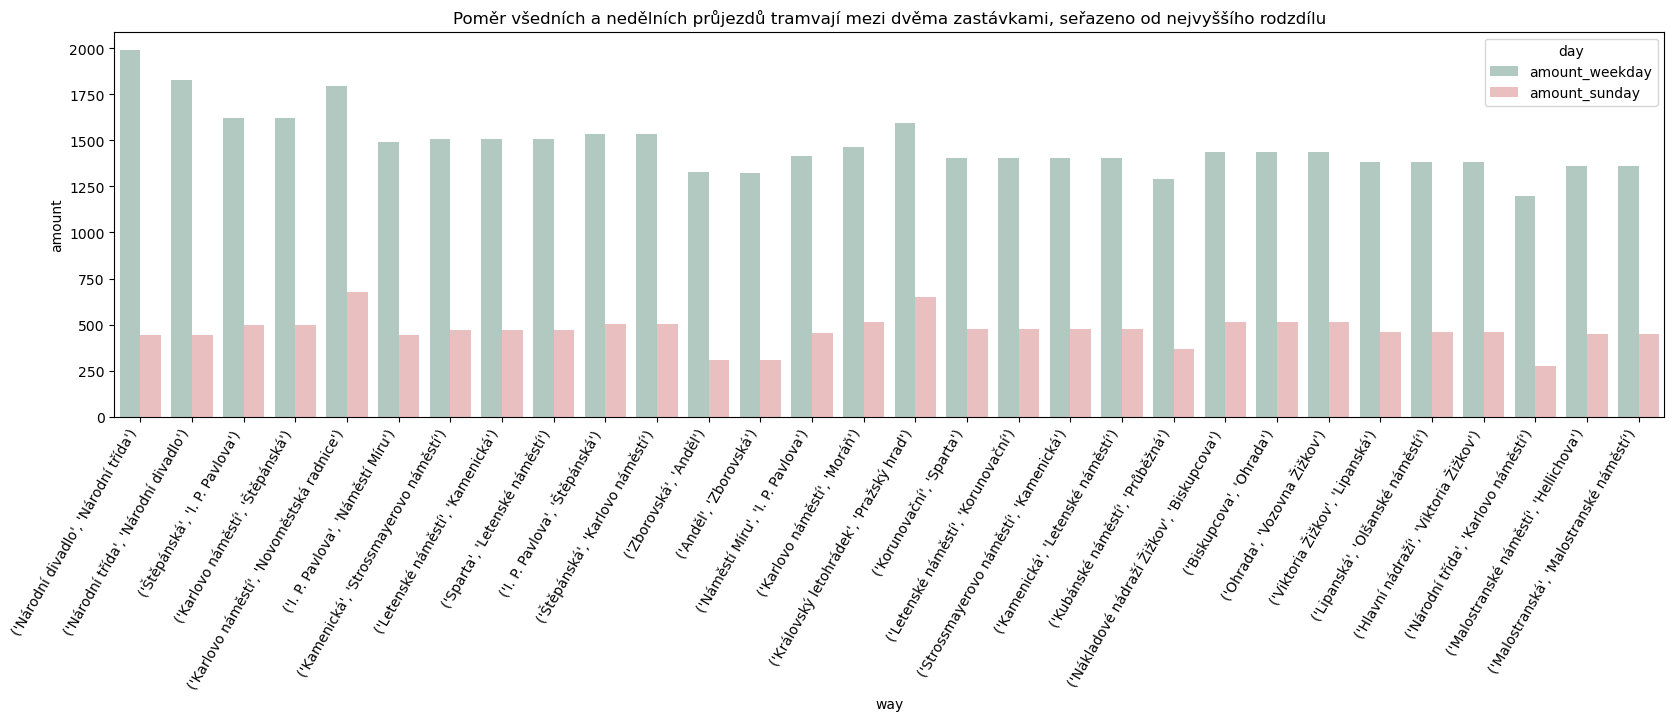

In [40]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=df_sun_week, x="way", y="amount", hue="day", palette=("#aecdc2","#f0b8b8"))
ax.xaxis.set_tick_params(labelsize=10)
plt.title("Poměr všedních a nedělních průjezdů tramvají mezi dvěma zastávkami, seřazeno od nejvyššího rodzdílu")
plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

Z grafu je vidět, že v neděli tramvají ubývá především v centu Prahy oproto všednímu dni. Lze tak soudit, že lidé v centru Prahy spíše pracují, ale nebydlí a tak není potřeba aby neděli jezdilo tolik tramvají. Zároveň během všedního dne jsou tramvajové linky v centru nejfrekventovanější a jezdí tak často, že o víkendu to přirozeně není potřeba. Avšak na okraji Prahy travaje nejezdí tak frekventovaně ani ve všední den. Například končí ve dřívější bývalé konečné stanici a tak ve finálne není rozdíl tak veliký.

In [41]:
G = nx.Graph()
# create an array of edges
for key in df_sunday.to_dict().keys():
    G.add_edge(key[0], key[1], weight = df_sunday.to_dict().get((key[0],key[1])))
nodes = G.nodes()
degrees = G.degree()
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

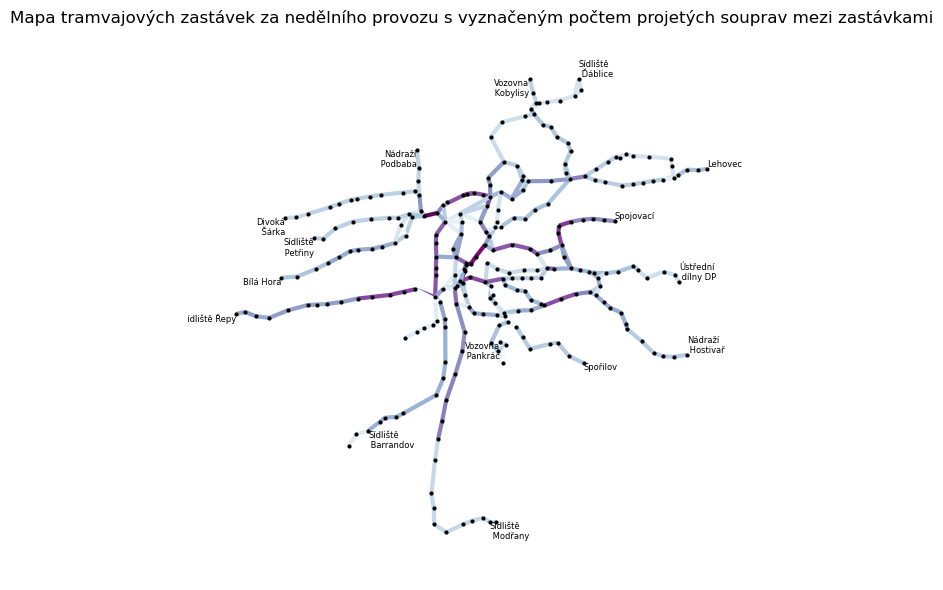

In [42]:
fig, ax = plt.subplots(figsize=(6,6))

nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=6, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=6, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=6, verticalalignment='top', horizontalalignment = "left")

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.spring_layout(G)
graph = nx.draw(G, pos=stops_pos, node_size=4, node_color='black', edgelist=edges,
                edge_color=weights, width=3.0, edge_cmap=mpl.colormaps["BuPu"])

plt.title("Mapa tramvajových zastávek za nedělního provozu s vyznačeným počtem projetých souprav mezi zastávkami")
plt.tight_layout()
plt.show()

In [43]:
G = nx.Graph()
# create an array of edges
for key in df_weekday.to_dict().keys():
    G.add_edge(key[0], key[1], weight = df_weekday.to_dict().get((key[0],key[1])))
nodes = G.nodes()
degrees = G.degree()
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

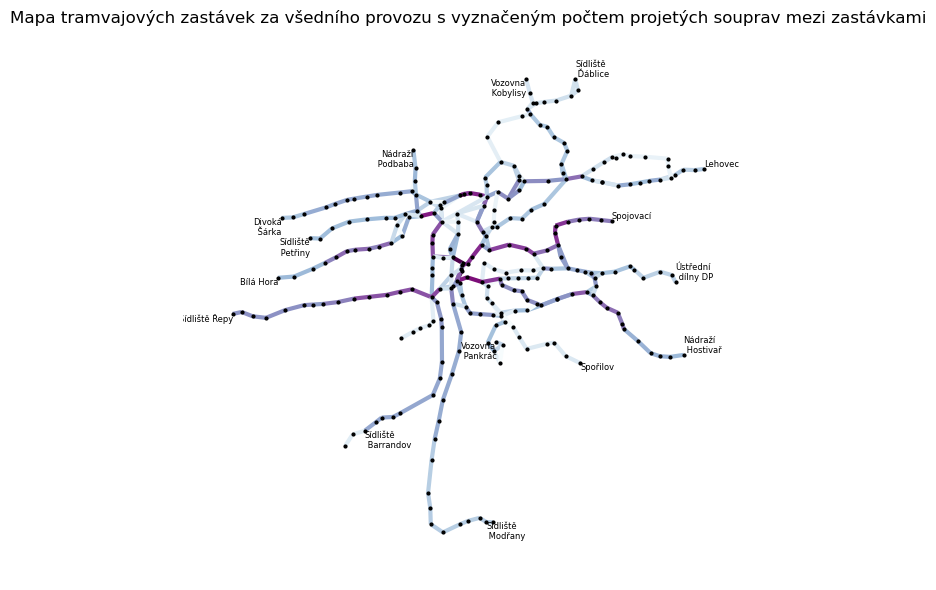

In [44]:
fig, ax = plt.subplots(figsize=(6,6))

nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_left, font_size=6, verticalalignment='bottom', horizontalalignment = "left")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_right, font_size=6, verticalalignment='top', horizontalalignment = "right")
nx.draw_networkx_labels(G, pos=stops_pos, labels=labeldict_down, font_size=6, verticalalignment='top', horizontalalignment = "left")

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.spring_layout(G)
graph = nx.draw(G, pos=stops_pos, node_size=4, node_color='black', edgelist=edges,
                edge_color=weights, width=3.0, edge_cmap=mpl.colormaps["BuPu"])

plt.title("Mapa tramvajových zastávek za všedního provozu s vyznačeným počtem projetých souprav mezi zastávkami")
plt.tight_layout()
plt.show()

Na mapách není vidět výrazný rozdíl. Poměr všední den vs. neděle, tedy nejspíš bude podobný u každé zastávky. Ale všimla jsem si, že například trasa tramvají z Karlova náměstí směrem na I.P. Pavlova, Náměstí mítu a dále do Vršovic směrem k Nádraží Hostivař, je viditelně výraznější oproti všednímu dni. A naopak úsek Anděl - Újezd je světlejší. Lze tak usuzovat, že například ve Vršovicích lidé spíše bydlí, ale nepracují, a tak je nutné pro ně zajistit podobnou dopravu jako přes všední den a ve výsledném poměru je tato trasa o víkendu frekventovanější. Naopak v úseku Anděl, Újezd lidé spíše pracují a tak o víkendu není doprava tolik nutná.